[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/pca_wahlanalyse/HEAD?labpath=notebooks%2Fbeispiel_hh2025.ipynb)

# Beispiel: Hauptkomponentenanalyse Hamburger Bürgerschaftswahl 2025

Dies ist ein Notebook, welches die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) auf die Positionen der Parteien auf die Thesen zur Hamburger Bürgerschaftswahl 2025 anwendet. Die Thesen und die Positionen wurden von der [Bundeszentrale für politische Bildung](https://www.bpb.de/) im Rahmen des [Wahl-O-Mats](https://www.bpb.de/themen/wahl-o-mat/) erstellt und veröffentlicht.

Zuerst werden alle benötigten Module importiert.

In [1]:
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
from pca_wahl import utils
from sklearn.decomposition import PCA

In [2]:
plt.rcParams["figure.dpi"] = 200.

## Laden der Daten

Die verfügbaren Wahldaten können mit folgender Funktion angezeigt werden.

In [3]:
utils.show_available_elections()

2024-06-09_eu: Europawahl 2024                                  (file found)
2014-05-25_eu: Europawahl 2014                                  (file found)
2009-06-07_eu: Europawahl 2009                                  (file found)
2004-06-13_eu: Europawahl 2009                                  (file found)
2025-02-23_de: Bundestagswahl 2025                              (file found)
2021-09-26_de: Bundestagswahl 2021                              (file found)
2017-09-24_de: Bundestagswahl 2017                              (file found)
2013-09-22_de: Bundestagswahl 2013                              (file found)
2009-09-27_de: Bundestagswahl 2009                              (file found)
2005-09-18_de: Bundestagswahl 2005                              (file found)
2026-03-08_bw: Landtagswahl in Baden-Württemberg 2026           (file NOT found)
2021-03-14_bw: Landtagswahl in Baden-Württemberg 2021           (file found)
2016-03-13_bw: Landtagswahl in Baden-Württemberg 2016           (file fo

Anhand der Kennung können die Daten zur Hamburger Bürgerschaftswahl über eine vordefinierte Funktion geladen.

In [4]:
data = utils.load_election_data("2025-03-02_hh")

## Nutzungsbedingungen

Zunächst seinen die Nutzungsbedingungen erwähnt.

In [5]:
print(data.note)

##### Hinweis zur Verwendung des Wahl-O-Mat-Datensatzes #####

Die Bundeszentrale für politische Bildung ist Urheber des nachfolgend veröffentlichten Wahl-O-Mat-Datensatzes. 
Die Veröffentlichung des Datensatzes dient lediglich dem Zugang zu den in ihm enthaltenen Informationen. 
Jede Nutzung des Datensatzes, egal welcher Art, wird untersagt. Die Schranken des Urheberrechts durch gesetzlich 
erlaubte Nutzung bleiben hiervon unberührt.

Eine Ausnahme gilt nur für die Analyse des Datensatzes zu wissenschaftlichen oder journalistischen Zwecken sowie 
für die Veröffentlichung der Ergebnisse dieser Analyse. 
Dabei muss jederzeit klar erkennbar sein, dass die Bundeszentrale für politische Bildung nicht Urheber dieser 
Analyse ist.

Explizit untersagt ist in diesem Rahmen die Nutzung des Datensatzes für die Erstellung von Angeboten, in deren 
Rahmen  ähnlich dem Wahl-O-Mat  Nutzerinnen und Nutzer sich auf Basis der eigenen Positionen ihre Nähe zu den 
Parteien anzeigen oder errechnen lass

## Disclaimer

An dieser Stelle sei erähnt, dass diese Analyse zu **wissenschaftlichen und journalistischen Zwecken** erstellt und veröffentlicht wurde. Es besteht **keine Verbindung zur Bundeszentrale für politische Bildung**.

## Bereinigung

Der Datensatz kann nun nach Belieben über eine vordefinierte Funktion bereinigt werden. Zum Beispiel um Parteien zu entfernen, die aus Gründen alle Thesen mit "neutral" beantwortet haben und damit nicht sinnvoll in einer Hauptkomponentenanalyse dargestellt werden können.

In [6]:
remove = []

In [7]:
data = utils.remove_party_from_data(data, remove=remove)

Folgende Parteien verbleiben im Datensatz:

In [8]:
data.parties

array(['SPD', 'GRÜNE', 'CDU', 'Die Linke', 'AfD', 'FDP', 'Die PARTEI',
       'Volt ', 'ÖDP', 'Tierschutzpartei', 'FREIE WÄHLER',
       'BÜNDNIS DEUTSCHLAND', 'BSW', 'DAVA-Hamburg', 'DieWahl - WFG',
       'NPD'], dtype='<U19')

### Hilfsvariablen

Nun lassen sich Hilfsvariablen definieren.

In [9]:
N_par, N_the = data.X.shape

In [10]:
N_komp = np.minimum(N_par, N_the)

In [11]:
N_max = 10
parties_short = []
for party in data.parties:
    if len(party) > N_max:
        parties_short.append(party[:N_max]+"...")
    else:
        parties_short.append(party)

## Die Thesen

Diese Thesen waren teil des Wahl-O-Mats:

In [12]:
md = []
for i in range(data.statements.shape[0]):
    md.append("* **These {:d}: {}** <br/> {}".format(i+1, data.statements[i], data.statements_long[i]))
display(Markdown("\n".join(md)))

* **These 1: Straßenbahn** <br/> In Hamburg soll eine neue Straßenbahn gebaut werden.
* **These 2: Elbvertiefung** <br/> Die Fahrrinne der Elbe soll für große Containerschiffe weiter vertieft werden.
* **These 3: Waffenverbotsgebiete** <br/> Im Hamburger Stadtgebiet sollen weitere Waffenverbotsgebiete ausgewiesen werden.
* **These 4: Öffnungszeiten an Sonntagen** <br/> In Hamburg sollen Läden auch sonntags öffnen dürfen.
* **These 5: Sozialwohnungen bei Neubauprojekten** <br/> Bei größeren Neubauprojekten soll mindestens die Hälfte der Wohneinheiten als Sozialwohnungen bereitgestellt werden.
* **These 6: Geschlechtliche und sexuelle Vielfalt** <br/> An Hamburger Schulen soll im Unterricht weiterhin über geschlechtliche und sexuelle Vielfalt informiert werden.
* **These 7: Bettelverbot** <br/> Betteln in Bussen, Bahnen und an Haltestellen soll in Hamburg weiterhin verboten sein.
* **These 8: Autobahn A26-Ost** <br/> Die Autobahn A26-Ost („Hafenpassage“) soll wie geplant fertiggestellt werden.
* **These 9: Gebührenfreie Deutschkurse** <br/> Alle Geflüchteten in Hamburg sollen Zugang zu gebührenfreien Deutschkursen haben.
* **These 10: Fernwärme aus Kohle** <br/> In Hamburg soll auch nach 2030 Fernwärme aus Kohleverbrennung erzeugt werden dürfen.
* **These 11: Abschaffung des Verfassungsschutzes** <br/> Das Landesamt für Verfassungsschutz Hamburg soll abgeschafft werden.
* **These 12: Einbürgerung** <br/> Die Hansestadt soll weiterhin für die Einbürgerung von in Hamburg lebenden Ausländerinnen und Ausländern werben.
* **These 13: Krankenhäuser in öffentlicher Hand** <br/> Mehr Krankenhäuser in Hamburg sollen wieder in öffentlicher Hand sein.
* **These 14: Schulwechsel** <br/> Bei zu schlechten Noten sollen Schülerinnen und Schüler weiterhin nach der 6. Klasse vom Gymnasium auf die Stadtteilschule wechseln müssen.
* **These 15: Blaue Moschee** <br/> Die Imam-Ali-Moschee („Blaue Moschee“) soll wieder als islamisches Gebetshaus geöffnet werden.
* **These 16: Fahrradstraßen** <br/> In Hamburg sollen weitere Straßen in Fahrradstraßen umgewandelt werden.
* **These 17: Leistungskürzungen beim Bürgergeld** <br/> Empfängerinnen und Empfängern von Bürgergeld, die Jobangebote ablehnen, sollen weiterhin Leistungen gekürzt werden.
* **These 18: Jugendparlamente** <br/> In allen Bezirken Hamburgs sollen Jugendparlamente eingerichtet werden müssen.
* **These 19: Gewerbesteuer** <br/> Die Gewerbesteuer soll gesenkt werden.
* **These 20: Projekte gegen Antisemitismus** <br/> Hamburg soll Projekte gegen Antisemitismus weiterhin finanziell fördern.
* **These 21: Tempo 30** <br/> Das Land soll sich dafür einsetzen, dass in Hamburg Tempo 30 zur Regelgeschwindigkeit wird.
* **These 22: Sozialwohnungen für Deutsche** <br/> Sozialwohnungen sollen vorrangig an Deutsche vergeben werden.
* **These 23: Führungspositionen** <br/> Führungspositionen in den landeseigenen Betrieben sollen zu gleichen Teilen mit Männern und Frauen besetzt werden.
* **These 24: Forschung für militärische Zwecke** <br/> An den Hochschulen in Hamburgischer Trägerschaft soll für militärische Zwecke geforscht werden dürfen.
* **These 25: Gemeinsamer Unterricht** <br/> Alle Schülerinnen und Schüler mit und ohne Behinderung sollen gemeinsam unterrichtet werden.
* **These 26: Aufarbeitung der Kolonialgeschichte** <br/> In Hamburg soll zur Aufarbeitung der Kolonialgeschichte der Stadt eine zentrale Erinnerungsstätte geschaffen werden.
* **These 27: Schuldenabbau** <br/> Die Haushaltsüberschüsse Hamburgs sollen vorrangig für den Schuldenabbau verwendet werden.
* **These 28: Taser für die Polizei** <br/> Hamburger Polizeikräfte im Streifendienst sollen mit Elektroschockpistolen („Tasern“) ausgestattet werden.
* **These 29: Entgeltfreier ÖPNV** <br/> Der öffentliche Personennahverkehr in Hamburg soll für alle entgeltfrei sein.
* **These 30: Sammelunterkünfte** <br/> Alle Asylbewerberinnen und Asylbewerber in Hamburg sollen bis zur Entscheidung über ihren Antrag in Sammelunterkünften untergebracht werden.
* **These 31: Kostenlose Endgeräte** <br/> Hamburg soll allen Schülerinnen und Schülern kostenlos digitale Endgeräte zur Verfügung stellen.
* **These 32: Vermummungsverbot auf Demonstrationen** <br/> Bei Demonstrationen in Hamburg soll Vermummung weiterhin verboten sein.
* **These 33: Leerstehende Mietwohnungen** <br/> Länger leerstehende Mietwohnungen sollen ihren Eigentümerinnen und Eigentümern konsequent entzogen und vermietet werden.
* **These 34: Fachkräfte aus dem Ausland** <br/> Hamburg soll weiterhin Fachkräfte aus dem Ausland anwerben.
* **These 35: Drogenkonsumräume** <br/> In Hamburg sollen weitere Drogenkonsumräume mit medizinischer Betreuung eingerichtet werden.
* **These 36: Untersagen von Schreibweisen** <br/> Schreibweisen, die neben männlichen und weiblichen auch andere Geschlechtsidentitäten abbilden, sollen in der Schule untersagt werden.
* **These 37: Gesichtserkennung** <br/> Bei der Videoüberwachung öffentlicher Plätze in Hamburg soll automatisierte Gesichtserkennung eingesetzt werden dürfen.
* **These 38: Landstrom** <br/> Alle Containerschiffe im Hamburger Hafen sollen schon vor 2030 verpflichtet werden, Strom vom Festland („Landstrom“) zu nutzen.

Auf diese Thesen konnten die Parteien mit "stimme zu", "stimme nicht zu" und "neutral" antworten. Die Antworten wurde für diese Analyse in die Ganzzahlen $1$, $-1$ und $0$ konvertiert. Damit spannen die Parteien einen $N$-dimensionalen Raum auf, wobei $N$ die Anzahl der Thesen ist.

## Korrelationsmatrix

Aus den Daten kann nun eine [Korrelationsmatrix](https://de.wikipedia.org/wiki/Korrelationsmatrix) erstellt werden, welche sich wie folgt darstellen lässt, wobei ein blauer Wert Korrelation und ein roter Wert Antikorrelation bedeutet. Ein weißer Wert bedeutet keine Korrelation.

**Beispiel 1:**  
Der Wert $\left(9, 25\right)$ ist blau. Das bedeutet die Thesen $9$ und $25$ korrelieren. Stimmt eine Partei der These $9$ _"Alle Geflüchteten in Hamburg sollen Zugang zu gebührenfreien Deutschkursen haben."_ zu bzw. nicht zu, stimmt sie oftmals auch der These $25$ _"Alle Schülerinnen und Schüler mit und ohne Behinderung sollen gemeinsam unterrichtet werden."_ zu bzw. nicht zu.

**Beispiel 2:**  
Der Wert $\left(7, 29\right)$ ist rot. Das bedeutet die Thesen $7$ und $29$ antikorrelieren. Stimmt eine Partei der These $7$ _"Betteln in Bussen, Bahnen und an Haltestellen soll in Hamburg weiterhin verboten sein."_ zu bzw. nicht zu, stimmt sie im Gegensatz oftmals der These $29$ _"Der öffentliche Personennahverkehr in Hamburg soll für alle entgeltfrei sein."_ nicht zu bzw. zu.

Die Diagonale ist tiefblau, weil die Thesen natürlich mit sich selbst korrelieren.

In [13]:
P = np.corrcoef(data.X.T)

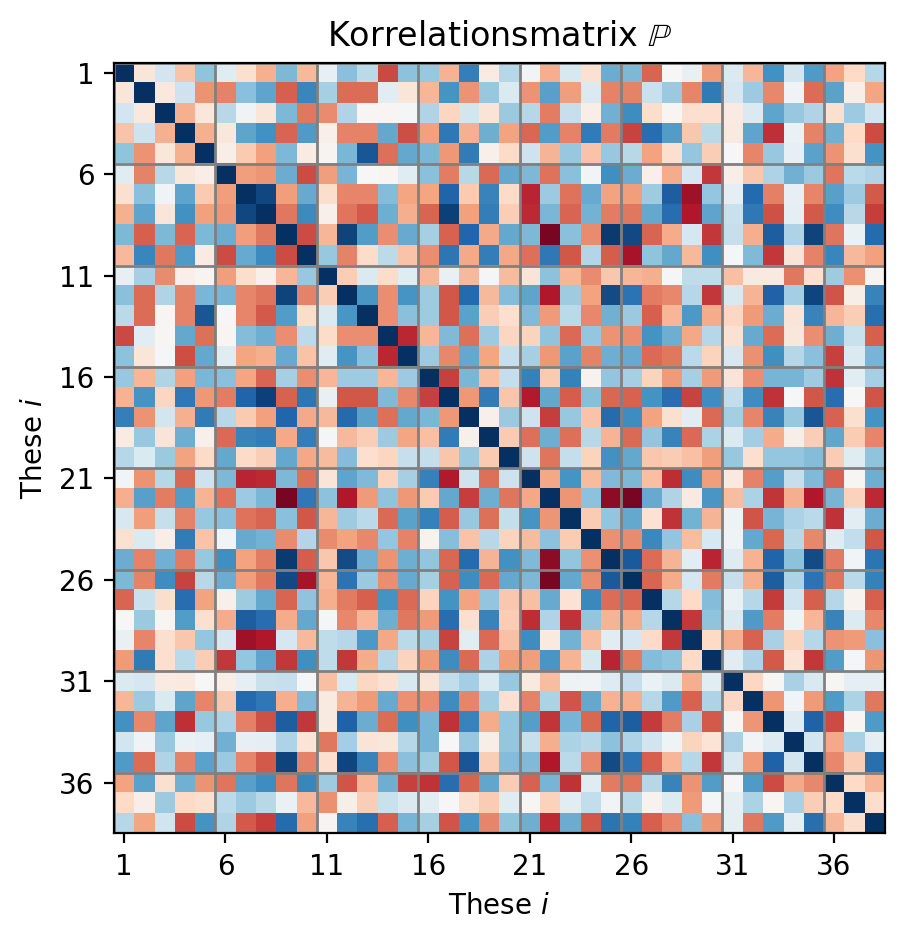

In [14]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_the+1, 5)
ax.imshow(P, vmin=-1, vmax=1, cmap="RdBu")
ax.set(
    aspect=1., title=r"Korrelationsmatrix $\mathbb{P}$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"These $i$", ylabel=r"These $i$",
)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

## Kovarianzmatrix

Die [Kovarianzmatrix](https://de.wikipedia.org/wiki/Kovarianzmatrix) ist ähnlich zur Korrelationsmatrix, wobei zusätzlich die Streuung der Parteipositionen pro These einen Einfluss hat.

Dies ist besonders auf der Diagonalen erkennbar, welche jetzt unterschiedliche Blautöne hat. Die Parteipositionen zu Thesen mit dunklerem Blauton weißen eine größere Streuung bzw. Varianz auf als Thesen mit hellerem Blauton. These $2$ (_"Die Fahrrinne der Elbe soll für große Containerschiffe weiter vertieft werden."_) hat einen helleren Blauton als These $24$ (_"An den Hochschulen in Hamburgischer Trägerschaft soll für militärische Zwecke geforscht werden dürfen."_). Das bedeutet die Parteien haben zu These $2$ oftmals die gleiche Position (über diese Position selbst wird hier keine Aussage getroffen), wohingegen sie sich bei These $24$ deutlich unterscheiden. 

In [15]:
covX = np.cov(data.X.T)

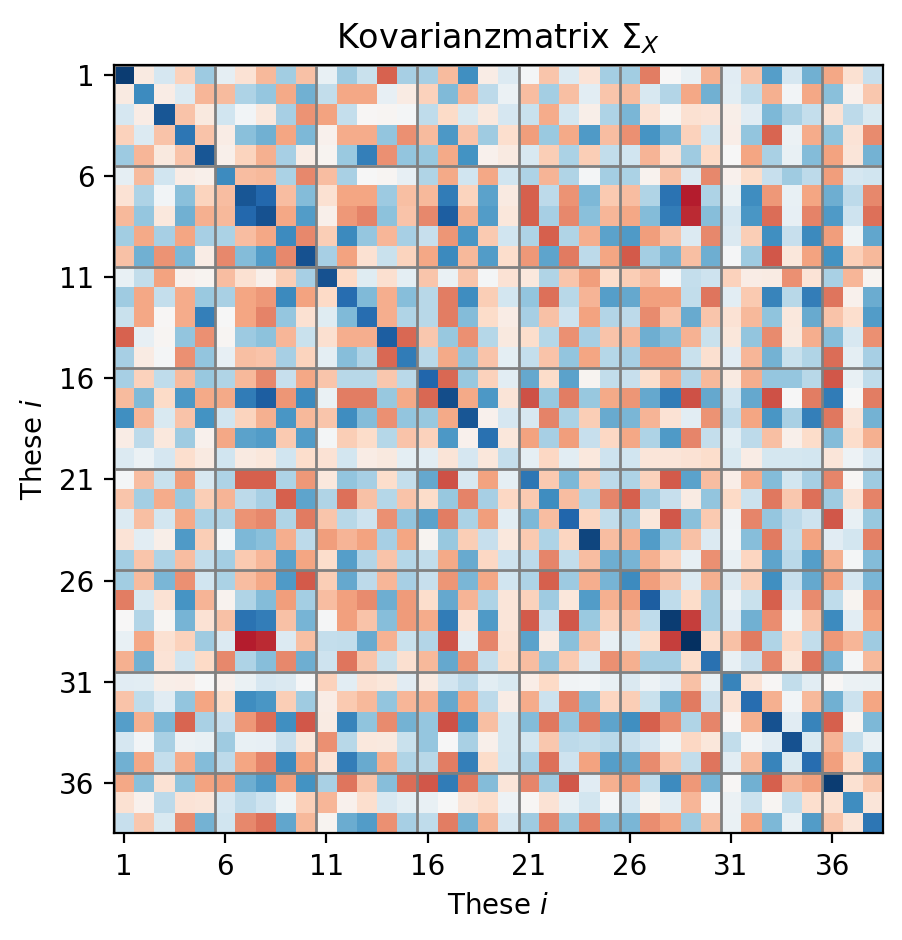

In [16]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_the+1, 5)
lim = np.abs(covX).max()
ax.imshow(covX, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set(
    aspect=1., title=r"Kovarianzmatrix $\Sigma_X$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"These $i$", ylabel=r"These $i$",
)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

## Hauptkomponentenanalyse

Ziel der Hauptkomponentenanalyse ist es nun die Kovarianzmatrix zu diagonalisieren, sodass nur Einträge auf der Diagonalen existieren. Weiterhin sollen diese Einträge absteigend nach Varianz sortiert sein. In anderen Worten: Die Daten werden in ein neues Koordinatensystem transformiert, in welchem die Parteien auf der neuen $x$-Achse die größste Streuung aufweisen und in welchem die neuen Koordinatenachsen nicht korrelieren.

In [17]:
pca = PCA()
Y = pca.fit_transform(data.X)

Um den Erfolg der Hauptkomponentenanalyse zu bestätigen wird die Kovarianzmatrix im neuen Koordinatensystem geplottet. Und in der Tat hat die erste Hauptkomponente deutlich die größte Varianz (tiefblau), während die Hauptkomponenten nicht miteinander korrelieren (weiß).

In [18]:
covY = np.cov(Y.T)

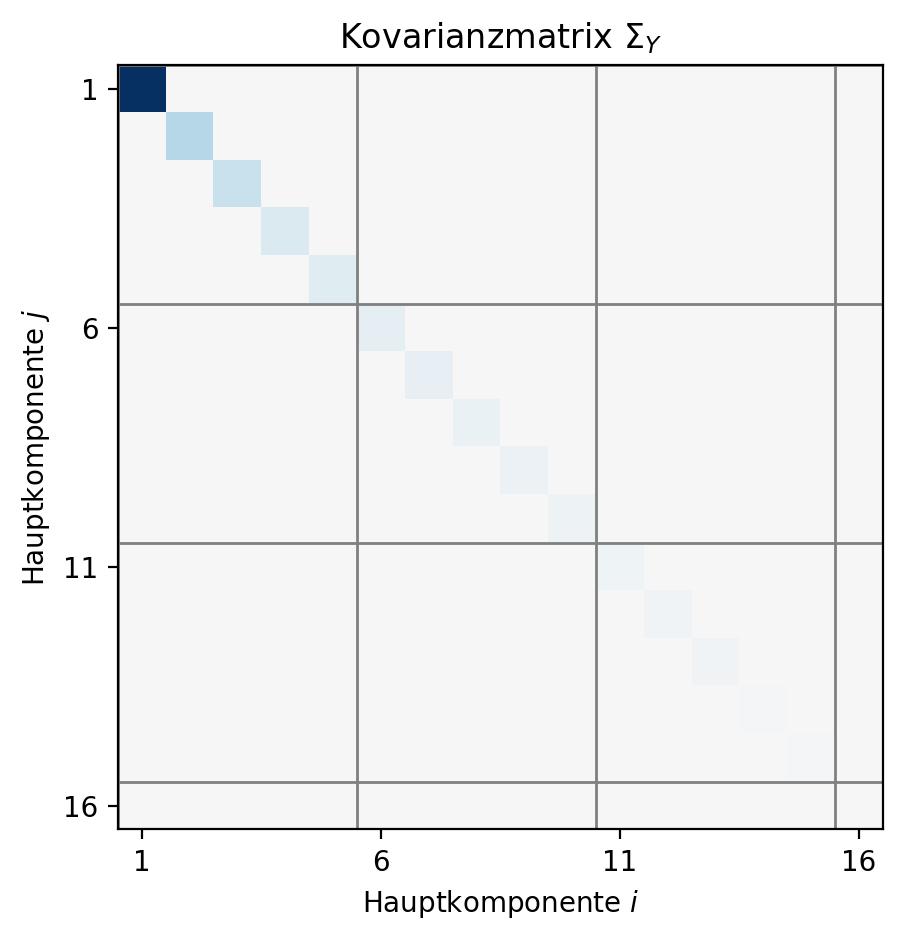

In [19]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_komp+1, 5)
lim = np.abs(covY).max()
ax.imshow(covY, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set(
    aspect=1., title=r"Kovarianzmatrix $\Sigma_Y$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"Hauptkomponente $i$", ylabel=r"Hauptkomponente $j$",
)
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

### Varianzbeiträge

Weiterhin lässt sich bestimmen, wieviel die einzelnen Hauptkomponenten zur Gesamtvarianz beitragen. Die erste Hauptkomponente trägt fast $45\,\%$ zur Gesamtvarianz bei, die zweite Hauptkomponente über $10\,\%$. Gemeinsam tragen beide Komponente über $55\,\%$ zur Gesamtvarianz bei.

In [20]:
expl_var_ratio = pca.explained_variance_ratio_

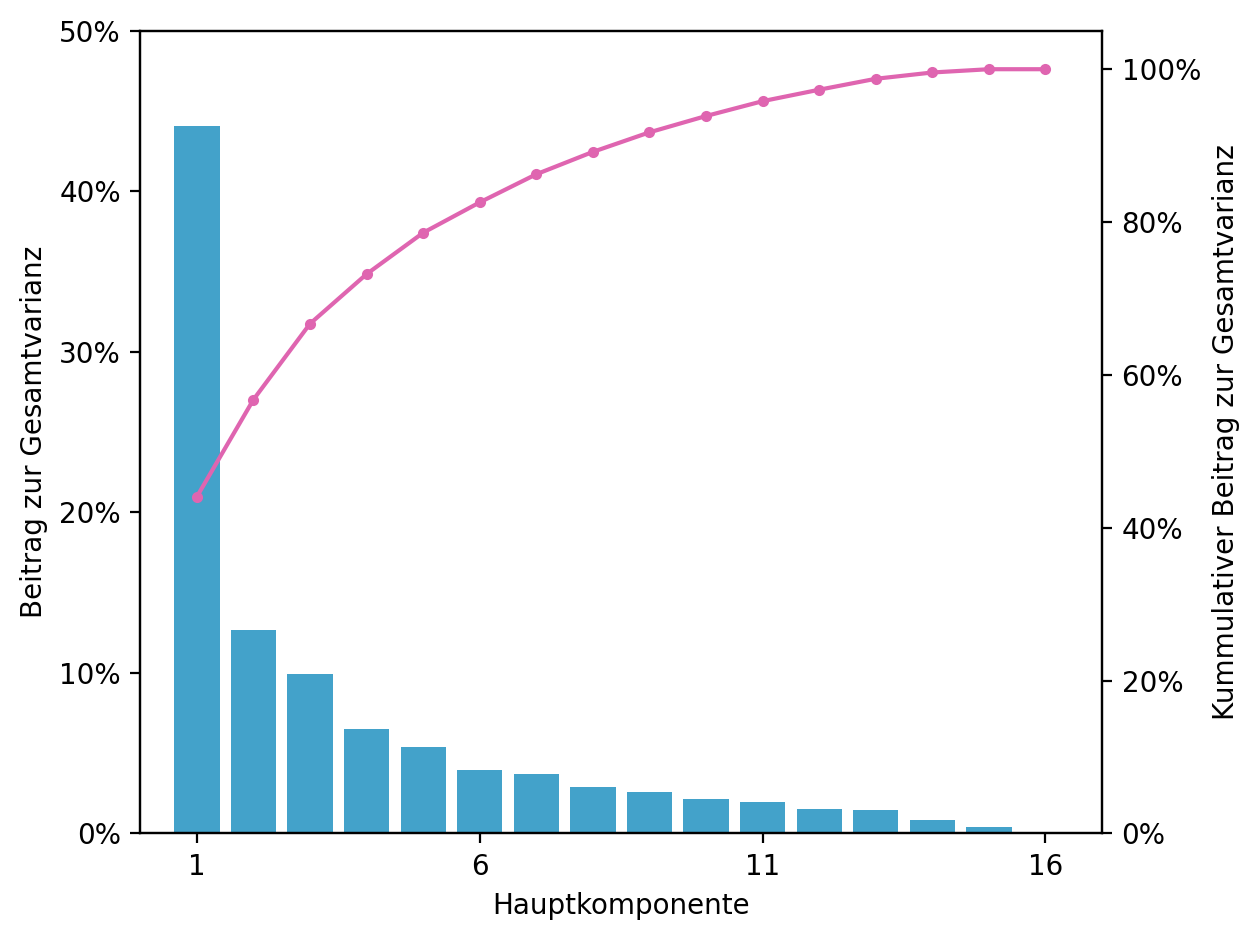

In [21]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ticks = np.arange(0, N_komp+1, 5)+1
ax.bar(np.arange(N_komp)+1, expl_var_ratio, color="#43a2ca")
ax.set(
    xlabel="Hauptkomponente", ylabel="Beitrag zur Gesamtvarianz",
    xlim=[0, N_komp+1], xticks=ticks, yticks=ax.get_yticks(),
)
ax.set_yticklabels(["{:.0f}%".format(100*t) for t in ax.get_yticks()])
axr = ax.twinx()
axr.plot(np.arange(N_komp)+1, expl_var_ratio.cumsum(), ".-", c="#df65b0")
axr.set(
    ylabel="Kummulativer Beitrag zur Gesamtvarianz",
    ylim=[0., 1.05], yticks=np.arange(0., 1.1, 0.2),
)
axr.set_yticklabels(["{:.0f}%".format(100*t) for t in axr.get_yticks()])
fig.set_layout_engine("tight")

### Reduzierte Darstellung

Da die ersten beiden Hauptkomponenten schon über die Hälfte der Gesamtvarianz tragen, lässt sich das System auch zweidimensional mit nur diesen beiden Komponenten darstellen, ohne dass allzu viel Information verloren geht.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, die politischen Nähe von Parteien zu analysieren, da sie nur eine zwei-dimensionale Projektion ist und ca. $45\,\%$ der Variationsinformation in den übrigen Dimensionen "versteckt" ist. In anderen Worten: Der Abstand, den Parteien in dieser Darstellung einnehmen, ist als untere Schranke zu sehen. Sie können sehr viel weiter voneinander entfernt sein.

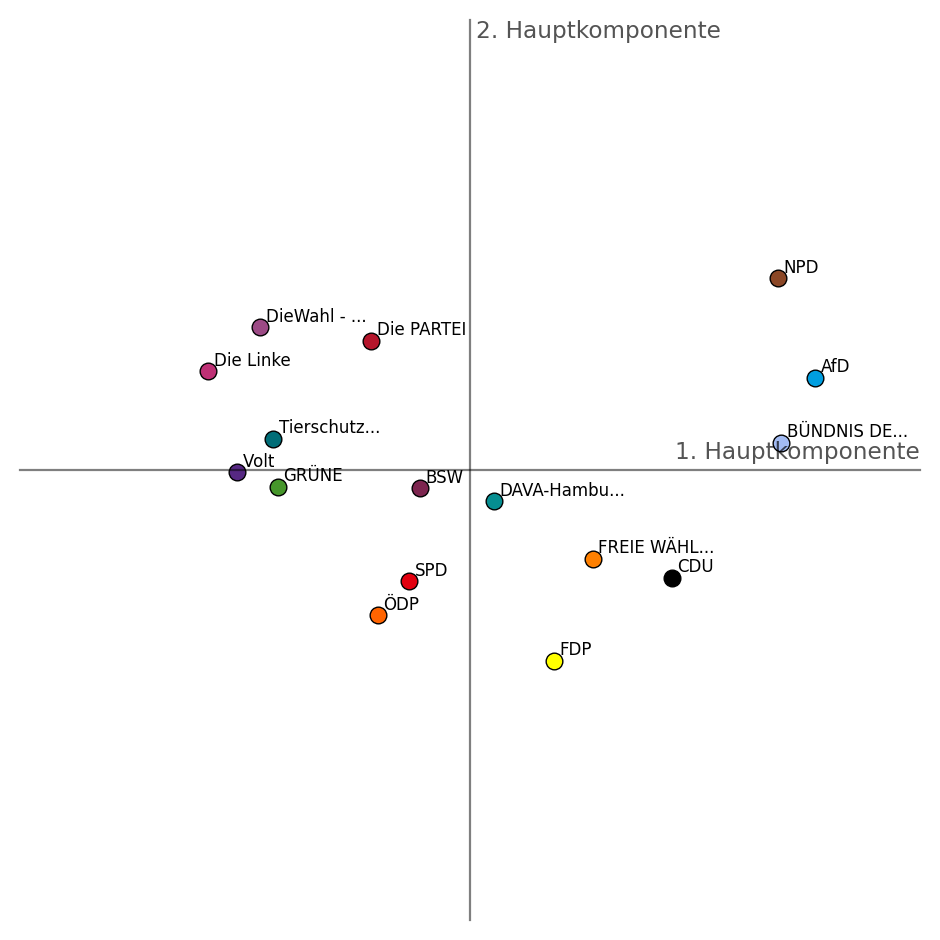

In [22]:
offset = 0.1
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(4.8, 4.8))
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True: # Parteinamen an-/ausschalten
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.set(
    aspect=1., xlim=[-lim, lim], ylim=[-lim, lim], xticks=[], yticks=[], xticklabels=[], yticklabels=[],
)
if True: # Achsen an-/ausschalten
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
fig.set_layout_engine("tight")

Interessanterweise spiegelt die erste Hauptkomponente oftmals das klassische Links-Rechts-Spektrum wieder. Das ist besonders bemerkenswert, da die Hauptkomponentenanalyse eine rein mathematische Operation ist, die kein politisches Vorwissen beinhaltet. Es könnte vorkommen, dass die "x"-Achse invertiert ist – dann stehen die "rechten Parteien" links und die "linken Parteien" rechts. In diesem Fall könnte man die erste Hauptkomponente mit $-1$ multiplizieren, um die gewohnte Darstellung zu erhalten.

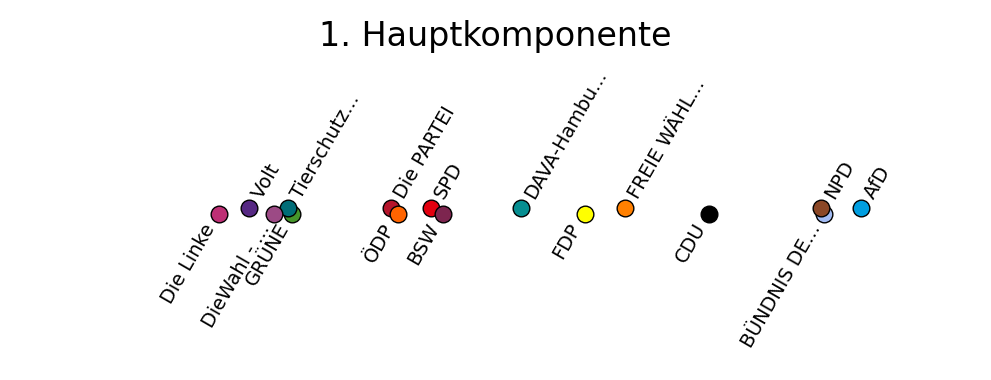

In [23]:
i_sorted = np.argsort(Y[:, 0])
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(6.4, 2.))
for i in range(N_par):
    up = (i==i_sorted).argmax()%2
    if up:
        ax.plot(Y[i, 0], 0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], 0.15, parties_short[i], rotation=60, ha="left", va="bottom", fontsize="x-small")
    else:
        ax.plot(Y[i, 0], -0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], -0.15, parties_short[i], rotation=60, ha="right", va="top", fontsize="x-small")
ax.set(
    aspect=1., title="1. Hauptkomponente", xlim=[-lim, lim], ylim=[-2.5, 2.5]
)
ax.axis("off")
fig.set_layout_engine("tight")

### Beiträge zu den Hauptkomponenten

Da die Hauptkomponentenanalyse eine Transformation in ein neues Koordinatensystem ist, beinhalten die neuen Achsen (die Hauptkomponenten) Beiträge von allen These zu verschiedenen Anteilen. Es ist möglich darzustellen, welche Thesen den größten Anteil zu einer Hauptkomponente haben.

Der folgende Plot zeigt um welchen Betrag eine Partei in positiver Richtung entlang der ersten Hauptkomponente wandert, wenn sie einer These _zustimmt_. Wenn eine Partei also These $22$ (_"Sozialwohnungen sollen vorrangig an Deutsche vergeben werden."_) zustimmt, wandert sie nach rechts. Wenn eine Partei These $21$ (_"Das Land soll sich dafür einsetzen, dass in Hamburg Tempo 30 zur Regelgeschwindigkeit wird."_), wandert sie nach links. Der Plot zeigt die Thesen, welche die erste Hauptkomponente bei Zustimmung am stärksten beeinflussen, also am polarisierendsten sind.

**Hinweis:** Bei Ablehnung einer These bedeutet das nicht, dass eine Partei um den selben Betrag in die entgegengesetzte Richtung wandert, und bei neutraler Haltung zu einer These bedeutet es nicht, dass eine Partei nicht entlang der Achse wandert. Der Grund dafür ist, dass der Schwerpunkt der Parteipositionen üblicherweise nicht auf der _"neutralen Position"_ zentriert ist.

In [24]:
komp_the = np.empty((N_komp, N_the))
i_sorted = np.empty((N_komp, N_the), dtype=int)
for i in range(N_komp):
    komp_the[i, :] = (1. - data.X.mean(0)) * pca.components_.T[:, i]
    i_sorted[i, :] = komp_the[i, :].argsort()
    komp_the[i, :] = komp_the[i, :][i_sorted[i, :]]

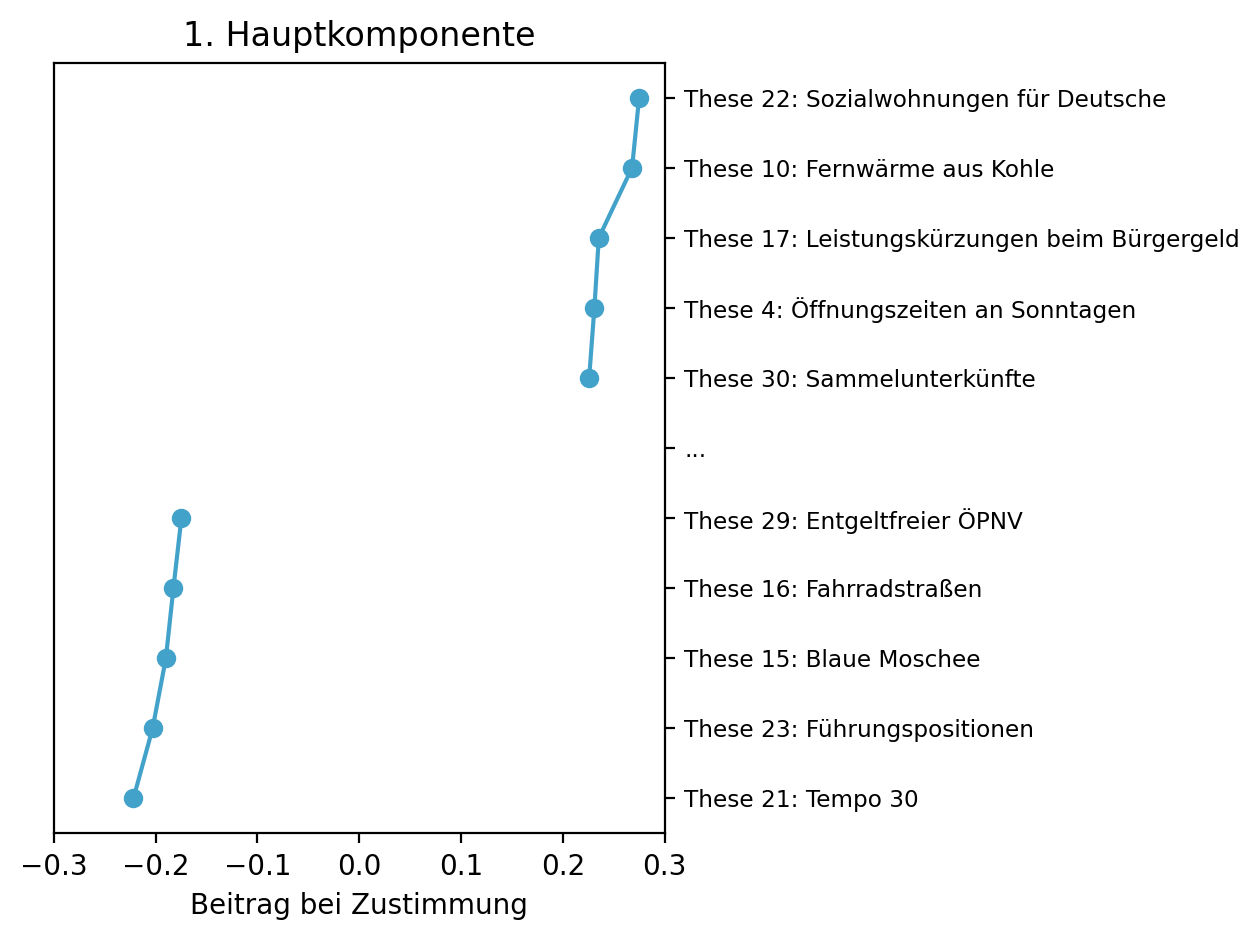

In [25]:
N_cut, N_pad = 5, 1
N_k = 1
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#43a2ca")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#43a2ca")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set(
    title="1. Hauptkomponente",
    yticks=np.arange(2*N_cut+N_pad),
    xlabel="Beitrag bei Zustimmung", xlim=[-lim, lim],
)
ax.set_yticklabels(ticklabels, fontsize="small")
fig.set_layout_engine("tight")

Die erste Hauptkomponente repräsentiert also üblicherweise das "Links-Rechts-Spektrum". Aber was repräsentiert die zweite Hauptkomponente?

Das lässt sich an folgendem Plot ablesen. Das sind typischerweise polarisierende, Wahlkampf-spezifische Themen, die je nach Wahl wechseln können. In diesem Beispiel wandert eine Partei nach oben in positive Richtung der zweiten Hauptkomponente wenn sie These $11$ (_"Das Landesamt für Verfassungsschutz Hamburg soll abgeschafft werden."_) zustimmt, und nach unten, wenn sie These $37$ (_"Bei der Videoüberwachung öffentlicher Plätze in Hamburg soll automatisierte Gesichtserkennung eingesetzt werden dürfen."_) zustimmt.

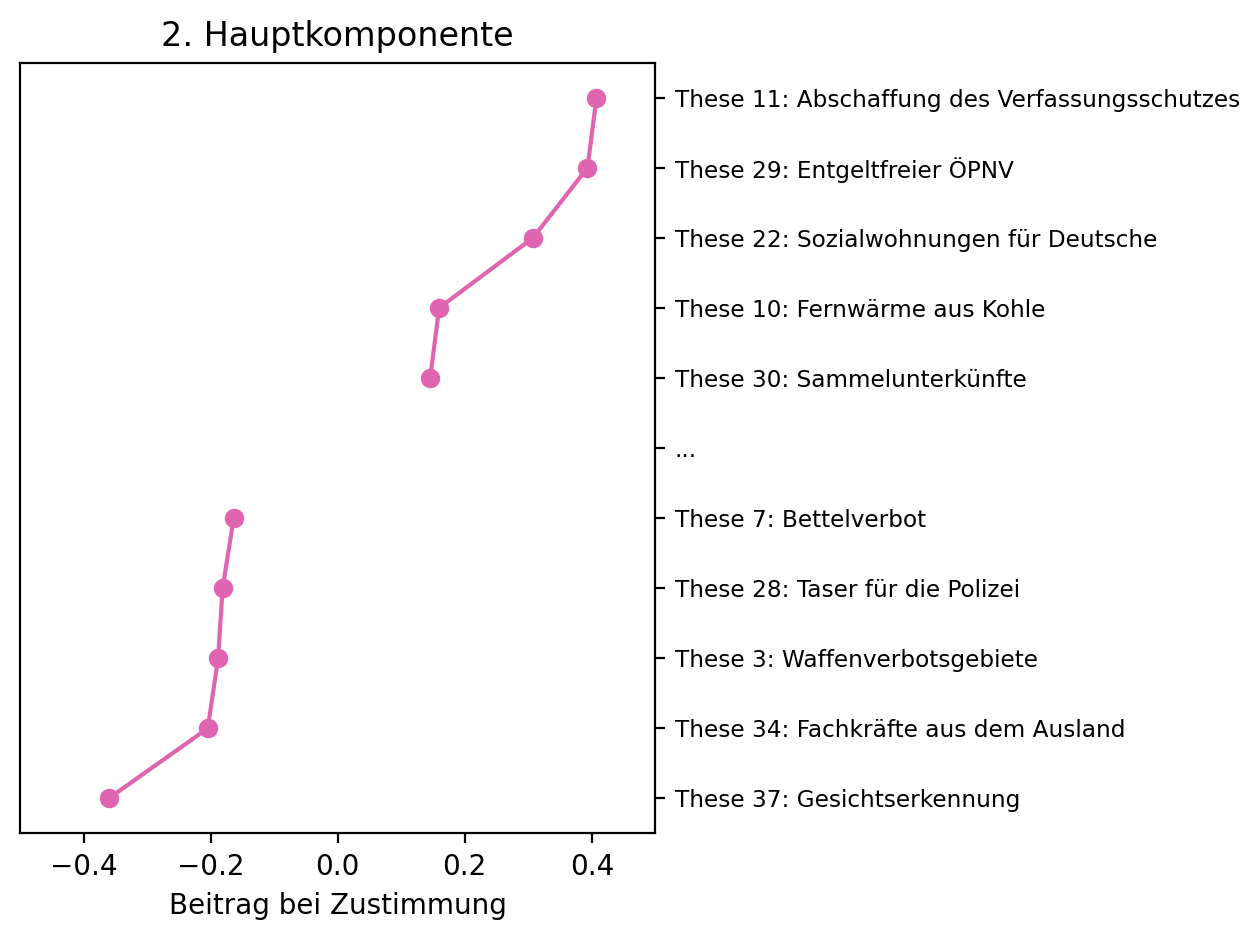

In [26]:
N_cut, N_pad = 5, 1
N_k = 2
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#df65b0")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#df65b0")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set(
    title="2. Hauptkomponente",
    yticks=np.arange(2*N_cut+N_pad),
    xlabel="Beitrag bei Zustimmung", xlim=[-lim, lim],
)
ax.set_yticklabels(ticklabels, fontsize="small")
fig.set_layout_engine("tight")

## Übereinstimmung der Parteien zueinander

Weiterhin lässt sich der Abstand der Parteien zueinander im $N$-dimensionalen Raum berechnen. Dazu kann man die $2$-Norm bzw. den Euklidischen Abstand berechnen.

Der nachfolgende Plot zeigt den Euklidischen Abstand aller Parteien voneinander im $N$-dimensionalen "Thesenraum", wobei die Parteien nach ihrer ersten Hauptkomponenten angeordnet sind. Je größer der Wert, desto größer die Übereinstimmung bzw. desto kleiner der Euklidische Abstand. Für jede Partei (horizontale Zeile) sind jeweils der größste und kleinste Wert hevorgehoben.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, um eine Aussage darüber zu treffen, ob Parteien eine Koalition eingehen könnten oder nicht. Einerseits geht keine Gewichtung bzw. "rote Linien" der Parteien bezüglich der Thesen in die Berechnung ein. Und andererseits ist der berechnete Wert auch von der Auswahl der Thesen abhängig. Zwei Parteien werden eine geringere Übereinstimmung haben, wenn die Thesen einen besonderen Fokus auf ein Thema haben, bei welchen die Positionen der beiden Parteien besonders verschieden sind.

In [27]:
norm = np.empty((N_par, N_par))
i_sorted = np.argsort(Y[:, 0])
for i, ii in enumerate(i_sorted):
    for j, jj in enumerate(i_sorted):
        if i==j:
            norm[i, i] = np.nan
            continue
        norm[i, j] = np.linalg.norm(data.X[ii, :]-data.X[jj, :])
        norm[j, i] = norm[i, j]
norm_max = 2.*N_the**0.5
norm = (norm_max-norm) / norm_max
norm_min = norm[np.where(~np.isnan(norm))].min()
norm_max = norm[np.where(~np.isnan(norm))].max()

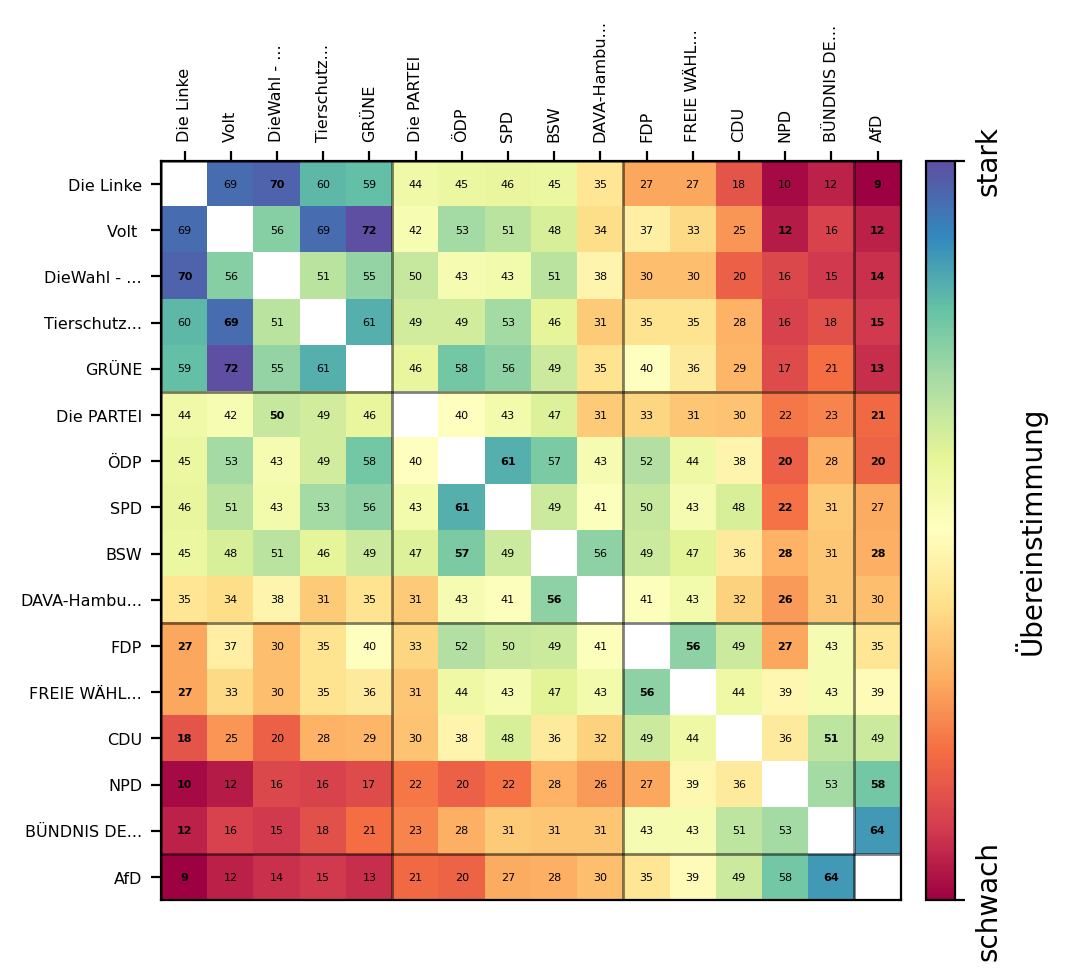

In [28]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
p = ax.matshow(norm, vmin=norm_min, vmax=norm_max, cmap="Spectral")
ax.set(
    aspect=1.,
    xticks=np.arange(N_par), yticks=np.arange(N_par),
)
ax.set_xticklabels(np.array(parties_short)[i_sorted], rotation=90, fontsize="xx-small")
ax.set_yticklabels(np.array(parties_short)[i_sorted], fontsize="xx-small")
ticks = np.arange(0, N_par, 5)
ax.xaxis.tick_top()
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
pos = ax.get_position()
cb_ax = fig.add_axes([1.03*pos.x1, pos.y0, 0.03, pos.y1-pos.y0])
cbar = plt.colorbar(p, ticks=[norm_min, norm_max], cax=cb_ax)
cbar.set_label("Übereinstimmung")
cbar.set_ticklabels(["schwach", "stark"], rotation=90, va="center")
if True: # Zahlen an-/ausschalten
    for i in range(N_par):
        for j in range(N_par):
            if j==i:
                continue
            nmax = np.round(norm[np.where(np.isfinite(norm[:, j])), j].max(), 2)
            nmin = np.round(norm[np.where(np.isfinite(norm[:, j])), j].min(), 2)
            if np.round(norm[i, j], 2)==nmin or np.round(norm[i, j], 2)==nmax:
                fontweight="bold"
            else:
                fontweight="normal"
            ax.text(i, j, "{:.0f}".format(norm[i, j]*100), fontsize=4, va="center", ha="center", fontweight=fontweight)

## Zusätzliche Partei hinzufügen

Abschließend sei erwähnt, dass es auch nach Berechnung der Hauptkomponentenanalyse möglich ist, einen beliebigen Thesen-Vektor in die neuen Koordinaten zu überführen.

Hier am Beispiel eines zufällig generierten Vektors.

In [29]:
X_random = np.random.randint(-1, high=1, size=(1, N_the))
Y_random = pca.transform(X_random)

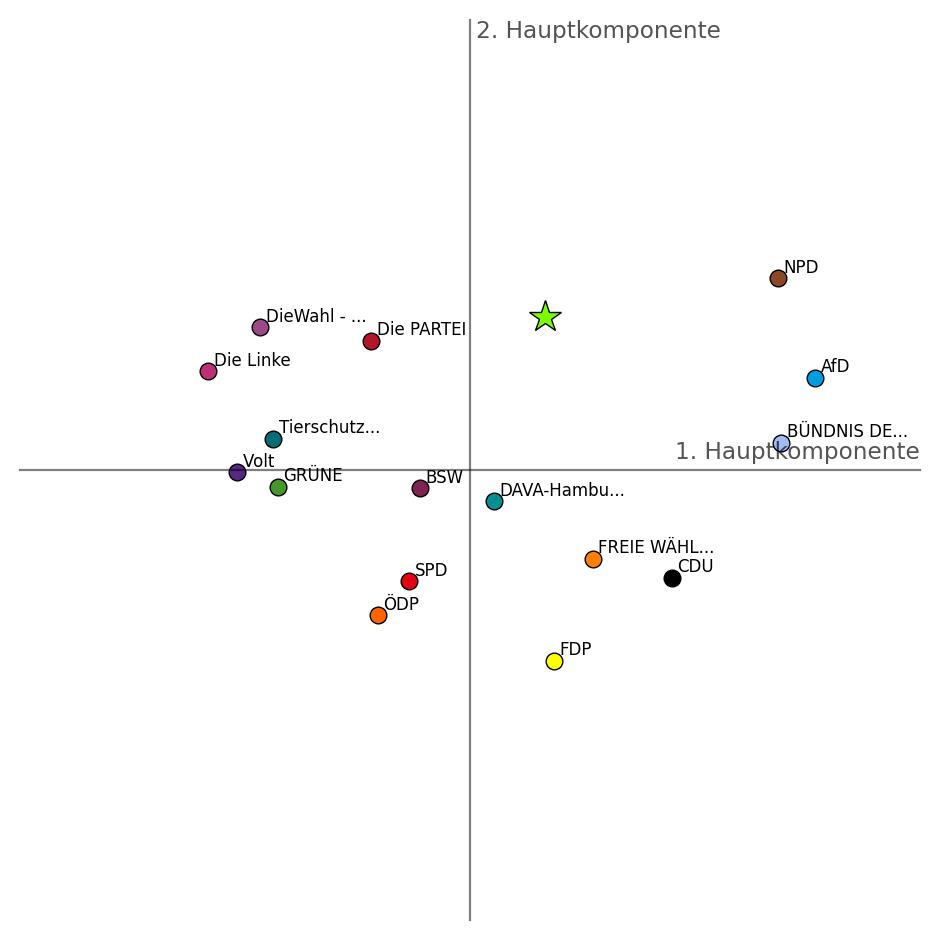

In [30]:
offset = 0.1
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(4.8, 4.8))
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True: # Parteinamen an-/ausschalten
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.plot(Y_random[0, 0], Y_random[0, 1], "*", markersize=12, c="lawngreen", markeredgecolor="black", markeredgewidth=0.5)
ax.set(
    aspect=1., xlim=[-lim, lim], ylim=[-lim, lim], xticks=[], yticks=[], xticklabels=[], yticklabels=[],
)
if True: # Achsen an-/ausschalten
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
fig.set_layout_engine("tight")